# Data Analysis

In [378]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats

In [379]:
df = pd.read_csv('processed_data.csv')
df.head()

,Tiempo_Cola_min,Tiempo_Servicio_min,Tiempo_Total_Sistema_min,Tiempo_Entre_Llegada_min
0,25.933333,6.666667,32.600000,NaN
1,27.600000,1.300000,28.900000,2.050000
2,21.916667,0.616667,22.533333,8.766667
3,21.350000,6.666667,28.016667,0.383333
4,17.350000,1.383333,18.733333,17.733333


## Tiempo en la cola

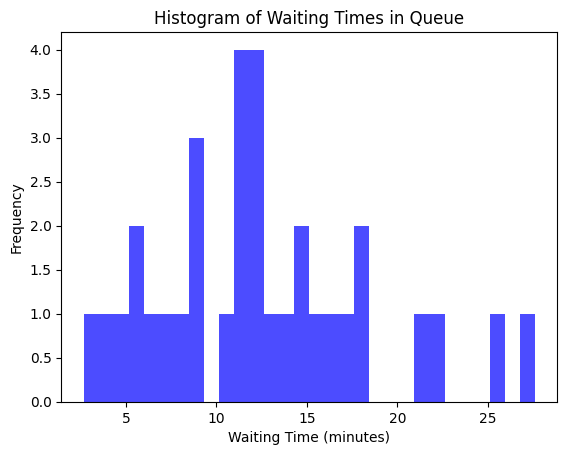

In [380]:
# Histogram of waiting times
plt.hist(df['Tiempo_Cola_min'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Waiting Times in Queue')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [381]:
# Test for normality
k2, p = stats.normaltest(df['Tiempo_Cola_min'])
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected. The data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. The data is normally distributed.")

The null hypothesis cannot be rejected. The data is normally distributed.


In [382]:
# Estimation of parameters for a normal distribution
mu, std = stats.norm.fit(df['Tiempo_Cola_min'].dropna())
print(f"Estimated mean (mu): {mu}")
print(f"Estimated standard deviation (std): {std}")

Estimated mean (mu): 12.554545454545455
Estimated standard deviation (std): 5.918804241450065


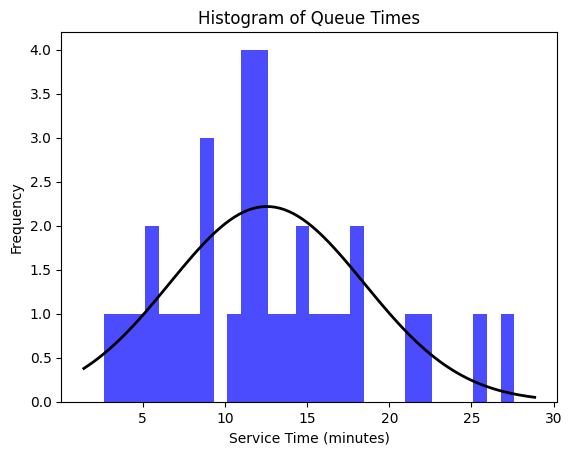

In [383]:
# Histogram of waiting times
plt.hist(df['Tiempo_Cola_min'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Queue Times')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')

# Overlay the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p * len(df['Tiempo_Cola_min']) * (xmax - xmin) / 30, 'k', linewidth=2)
plt.show()

## Tiempo de servicio

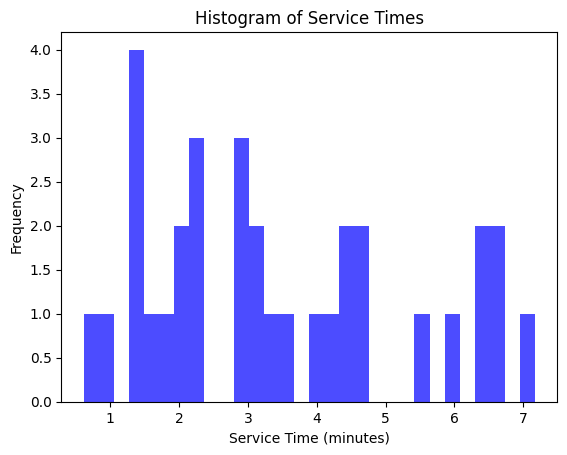

In [384]:
# Histogram of waiting times
plt.hist(df['Tiempo_Servicio_min'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Service Times')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [385]:
# Test for normality
k2, p = stats.normaltest(df['Tiempo_Servicio_min'])
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected. The data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. The data is normally distributed.")

The null hypothesis cannot be rejected. The data is normally distributed.


In [386]:
# Estimation of parameters for a normal distribution
mu, std = stats.norm.fit(df['Tiempo_Servicio_min'].dropna())
print(f"Estimated mean (mu): {mu}")
print(f"Estimated standard deviation (std): {std}")

Estimated mean (mu): 3.4838383838383837
Estimated standard deviation (std): 1.8803184272940663


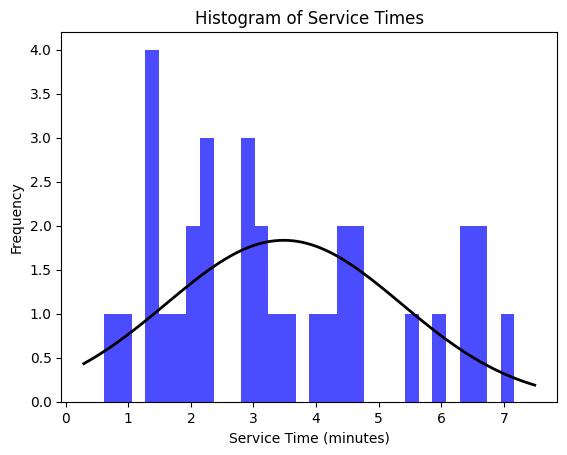

In [387]:
# Histogram of waiting times
plt.hist(df['Tiempo_Servicio_min'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Service Times')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')

# Overlay the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p * len(df['Tiempo_Servicio_min']) * (xmax - xmin) / 30, 'k', linewidth=2)
plt.show()

## Tiempo total en el sistema

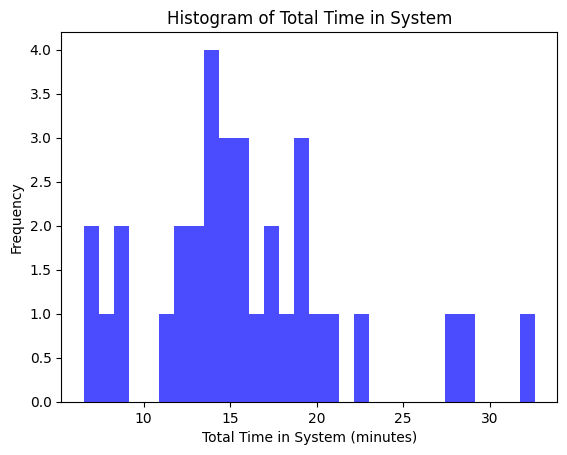

In [388]:
# Histogram of waiting times
plt.hist(df['Tiempo_Total_Sistema_min'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Total Time in System')
plt.xlabel('Total Time in System (minutes)')
plt.ylabel('Frequency')
plt.show()

In [389]:
# Test for normality
k2, p = stats.normaltest(df['Tiempo_Total_Sistema_min'])
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected. The data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. The data is normally distributed.")

The null hypothesis cannot be rejected. The data is normally distributed.


In [390]:
# Estimation of parameters for a normal distribution
mu, std = stats.norm.fit(df['Tiempo_Total_Sistema_min'].dropna())
print(f"Estimated mean (mu): {mu}")
print(f"Estimated standard deviation (std): {std}")

Estimated mean (mu): 16.038383838383837
Estimated standard deviation (std): 5.875968986425622


# Tiempo entre llegada de clientes (min)

In [391]:
df_filtered = df[df['Tiempo_Entre_Llegada_min'] < 12]

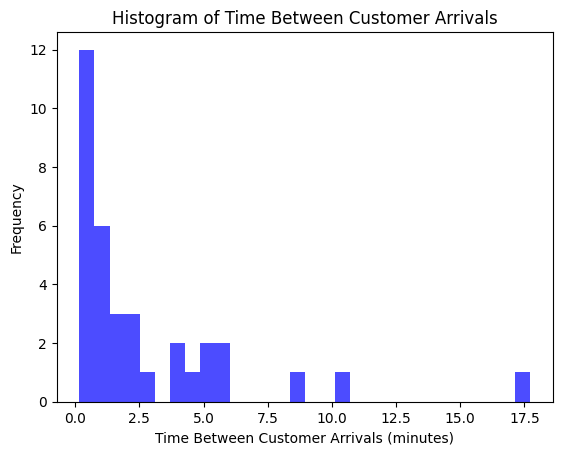

In [392]:
# Histogram of waiting times
plt.hist(df['Tiempo_Entre_Llegada_min'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Time Between Customer Arrivals')
plt.xlabel('Time Between Customer Arrivals (minutes)')
plt.ylabel('Frequency')
plt.show()

In [393]:
# Test for normality
k2, p = stats.normaltest(df['Tiempo_Entre_Llegada_min'])
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected. The data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. The data is normally distributed.")

The null hypothesis cannot be rejected. The data is normally distributed.


In [394]:
# Estimation of parameters for an exponential distribution
mean_waiting_time = np.mean(df_filtered['Tiempo_Entre_Llegada_min'])
print(f"Mean time between arrivals: {mean_waiting_time} minutes")
lambda_param = 1 / mean_waiting_time
print(f"Estimated rate parameter (lambda): {lambda_param}")

Mean time between arrivals: 2.2914705882352946 minutes
Estimated rate parameter (lambda): 0.4364009754845333


# Gasolina por vehículo

In [395]:
df = pd.read_csv('gas_by_car.csv')
df.head()

,cantidad,capacidad,marca,modelo,tipo_vehiculo
0,52,NaN,"""Toyota""","""Fortuner""","""Particulares"""
1,10,NaN,"""Ford""","""Fiesta""","""Particulares"""
2,31,NaN,"""Daihatsu""","""Terios sport""","""Particulares"""
3,69,NaN,"""CHEVROLET LUV""","""CAMIONETA CARGA PICK-UP""","""Carga"""
4,75,NaN,"""Ford""","""Maverick""","""Particulares"""


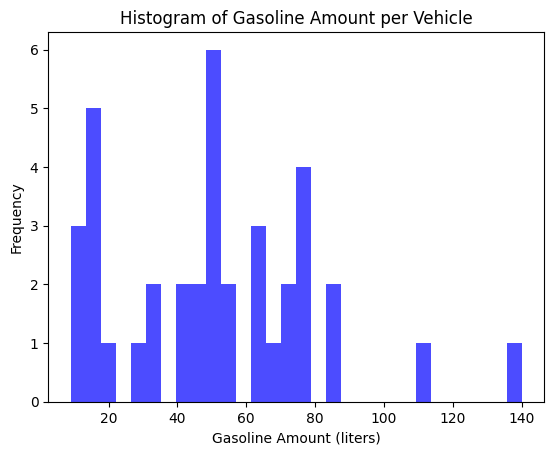

In [396]:
# Histogram of waiting times
plt.hist(df['cantidad'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Gasoline Amount per Vehicle')
plt.xlabel('Gasoline Amount (liters)')
plt.ylabel('Frequency')
plt.show()

In [397]:
# Test for normality
k2, p = stats.normaltest(df['cantidad'])
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected. The data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. The data is normally distributed.")

The null hypothesis cannot be rejected. The data is normally distributed.


In [398]:
df['cantidad'].describe()

count     38.000000
mean      51.342105
std       29.577453
min        9.000000
25%       30.250000
50%       52.000000
75%       71.250000
max      140.000000
Name: cantidad, dtype: float64

In [399]:
# Estimation of parameters for a normal distribution
mu, std = stats.norm.fit(df['cantidad'])
print(f"Estimated mean (mu): {mu}")
print(f"Estimated standard deviation (std): {std}")

Estimated mean (mu): 51.3421052631579
Estimated standard deviation (std): 29.185681705598356


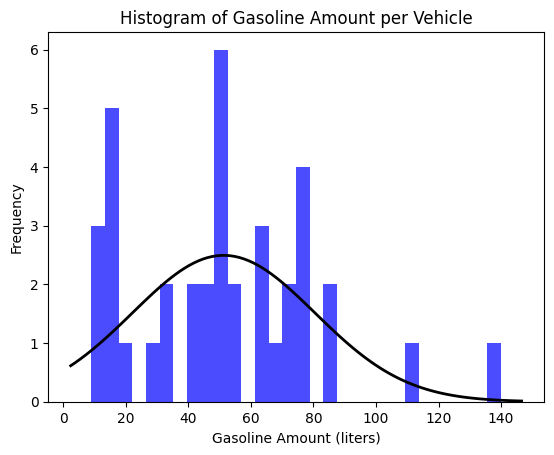

In [400]:
# Histogram of waiting times
plt.hist(df['cantidad'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Gasoline Amount per Vehicle')
plt.xlabel('Gasoline Amount (liters)')
plt.ylabel('Frequency')

# Overlay the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p * len(df['cantidad']) * (xmax - xmin) / 30, 'k', linewidth=2)
plt.show()

# Tiempo de servicio

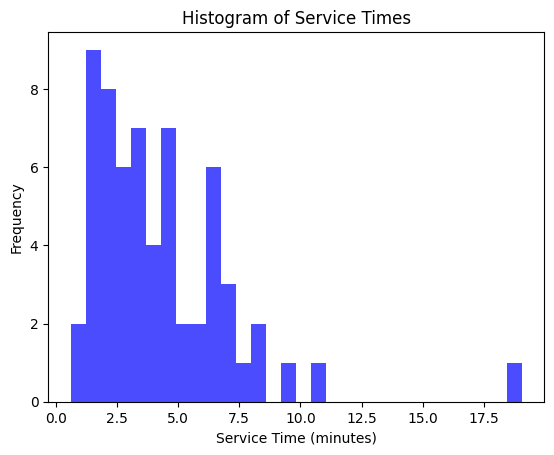

In [401]:
df = pd.read_csv('raw_data.csv')
df['tiempo_servicio_min'] = df['tiempo_servicio'] / 60

plt.hist(df['tiempo_servicio_min'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Service Times')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [402]:
# Test for normality
k2, p = stats.normaltest(df['tiempo_servicio_min'])
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected. The data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. The data is normally distributed.")

The null hypothesis can be rejected. The data is not normally distributed.


In [403]:
# Estimation of parameters for a normal distribution
mu, std = stats.norm.fit(df['tiempo_servicio_min'])
print(f"Estimated mean (mu): {mu}")
print(f"Estimated standard deviation (std): {std}")

Estimated mean (mu): 4.3096774193548395
Estimated standard deviation (std): 2.926779011099522


In [404]:
# Estimation of parameters for a gamma distribution
a, loc, scale = stats.gamma.fit(df['tiempo_servicio_min'])
print(f"Estimated shape (a): {a}")
print(f"Estimated location (loc): {loc}")
print(f"Estimated scale (scale): {scale}")

Estimated shape (a): 1.9181349832628616
Estimated location (loc): 0.476380509654714
Estimated scale (scale): 1.9984614797861968


In [405]:
# Estimation of parameters for a exponential distribution
mean_service_time = np.mean(df['tiempo_servicio_min'])
print(f"Mean service time: {mean_service_time} minutes")
lambda_param = 1 / mean_service_time
print(f"Estimated rate parameter (lambda): {lambda_param}")

Mean service time: 4.3096774193548395 minutes
Estimated rate parameter (lambda): 0.23203592814371254


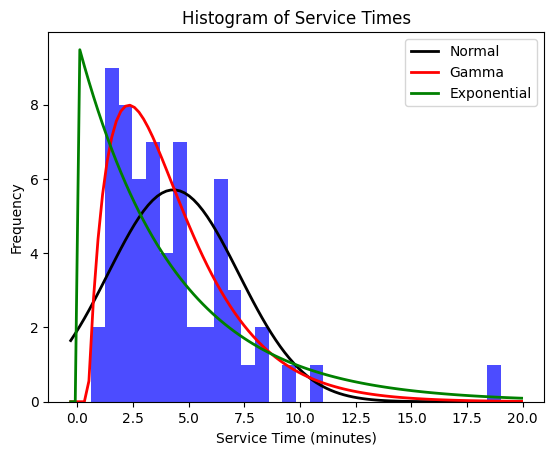

In [406]:
plt.hist(df['tiempo_servicio_min'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Service Times')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p * len(df['tiempo_servicio_min']) * (xmax - xmin) / 30, 'k', linewidth=2)

# Gamma
p_gamma = stats.gamma.pdf(x, a, loc, scale)
plt.plot(x, p_gamma * len(df['tiempo_servicio_min']) * (xmax - xmin) / 30, 'r', linewidth=2)

# Exponential
p_expon = stats.expon.pdf(x, scale=1/lambda_param)
plt.plot(x, p_expon * len(df['tiempo_servicio_min']) * (xmax - xmin) / 30, 'g', linewidth=2)

plt.legend(['Normal', 'Gamma', 'Exponential'])
plt.show()